In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline

In [2]:
df = pd.read_csv('../Niteo/Lending/loan.csv/loan.csv')

C:\Users\amuthiyan\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2723: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 74 columns):
id                             887379 non-null int64
member_id                      887379 non-null int64
loan_amnt                      887379 non-null float64
funded_amnt                    887379 non-null float64
funded_amnt_inv                887379 non-null float64
term                           887379 non-null object
int_rate                       887379 non-null float64
installment                    887379 non-null float64
grade                          887379 non-null object
sub_grade                      887379 non-null object
emp_title                      835922 non-null object
emp_length                     887379 non-null object
home_ownership                 887379 non-null object
annual_inc                     887375 non-null float64
verification_status            887379 non-null object
issue_d                        887379 non-null object
loan_status          

In [6]:
df.issue_d.sample(5)

466617    Dec-2015
545429    Oct-2015
866634    Jan-2015
610591    Sep-2015
357315    Jul-2014
Name: issue_d, dtype: object

In [7]:
df1=df.copy()

In [8]:
df1.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
def year(x):
    x=x.split('-')
    x=x[-1]
    return x
df1['issue_year']=df1.issue_d.apply(year)

In [11]:
df1.issue_year.sample(5)

98078     2013
462633    2014
254892    2014
132555    2013
843662    2015
Name: issue_year, dtype: object

In [12]:
def month(x):
    x=x.split('-')
    x=x[0]
    return x
df1['issue_d']=df1.issue_d.apply(month)

In [13]:
df1.issue_d.sample(5)

176927    Dec
134037    Jun
225472    Feb
455222    Jan
66044     Nov
Name: issue_d, dtype: object

In [14]:
df1['issue_year']=pd.to_datetime(df1['issue_year'])

In [16]:
df1.issue_year.sample(5)

853196   2015-01-01
39146    2008-01-01
777534   2015-01-01
702181   2015-01-01
223686   2012-01-01
Name: issue_year, dtype: datetime64[ns]

In [19]:
df1['issue_year']=df1.issue_year.dt.year

In [21]:
df1.issue_year.head()

0    2011
1    2011
2    2011
3    2011
4    2011
Name: issue_year, dtype: int64

In [23]:
del df1['year']

In [1]:
df1=df1[df1.issue_year>2008]
df1=df1[df1.issue_year<2014]
df1.issue_year.head()

NameError: name 'df1' is not defined

In [35]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 227661 entries, 0 to 230656
Data columns (total 75 columns):
id                             227661 non-null int64
member_id                      227661 non-null int64
loan_amnt                      227661 non-null float64
funded_amnt                    227661 non-null float64
funded_amnt_inv                227661 non-null float64
term                           227661 non-null object
int_rate                       227661 non-null float64
installment                    227661 non-null float64
grade                          227661 non-null object
sub_grade                      227661 non-null object
emp_title                      213465 non-null object
emp_length                     227661 non-null object
home_ownership                 227661 non-null object
annual_inc                     227661 non-null float64
verification_status            227661 non-null object
issue_d                        227661 non-null object
loan_status          

In [41]:
df1=df1.dropna(axis=1,how='all')

In [42]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 227661 entries, 0 to 230656
Data columns (total 58 columns):
id                             227661 non-null int64
member_id                      227661 non-null int64
loan_amnt                      227661 non-null float64
funded_amnt                    227661 non-null float64
funded_amnt_inv                227661 non-null float64
term                           227661 non-null object
int_rate                       227661 non-null float64
installment                    227661 non-null float64
grade                          227661 non-null object
sub_grade                      227661 non-null object
emp_title                      213465 non-null object
emp_length                     227661 non-null object
home_ownership                 227661 non-null object
annual_inc                     227661 non-null float64
verification_status            227661 non-null object
issue_d                        227661 non-null object
loan_status          

In [52]:
del df1['next_pymnt_d']

In [53]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 227661 entries, 0 to 230656
Data columns (total 57 columns):
id                             227661 non-null int64
member_id                      227661 non-null int64
loan_amnt                      227661 non-null float64
funded_amnt                    227661 non-null float64
funded_amnt_inv                227661 non-null float64
term                           227661 non-null object
int_rate                       227661 non-null float64
installment                    227661 non-null float64
grade                          227661 non-null object
sub_grade                      227661 non-null object
emp_title                      213465 non-null object
emp_length                     227661 non-null object
home_ownership                 227661 non-null object
annual_inc                     227661 non-null float64
verification_status            227661 non-null object
issue_d                        227661 non-null object
loan_status          

In [55]:
df1.desc.sample(5)

94893                                                   NaN
128406      Borrower added on 06/05/13 > Somehow I've in...
133749                                                  NaN
109154      Borrower added on 07/23/13 > credit card ref...
23186                                                   NaN
Name: desc, dtype: object

In [56]:
del df1['desc']

In [58]:
df1.mths_since_last_delinq.describe()

count    94141.000000
mean        35.289343
std         21.601465
min          0.000000
25%         17.000000
50%         32.000000
75%         50.000000
max        156.000000
Name: mths_since_last_delinq, dtype: float64

In [59]:
df1.mths_since_last_record.describe()

count    19611.000000
mean        86.621539
std         26.098553
min          0.000000
25%         71.000000
50%         95.000000
75%        106.000000
max        121.000000
Name: mths_since_last_record, dtype: float64

In [63]:
df1=df1.drop(df1.columns[0:2],axis=1)

In [66]:
df1.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,issue_year
0,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,...,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,2011
1,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,...,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,2011
2,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,...,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,2011
3,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,Jan-2015,0.0,NaN,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,2011
4,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,...,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,2011


In [68]:
df1=df1[(df1.grade=='C')|(df1.grade=='D')]

In [69]:
df1.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,issue_year
1,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,...,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,2011
2,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,...,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,2011
3,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,Jan-2015,0.0,NaN,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,2011
6,7000.0,7000.0,7000.0,60 months,15.96,170.08,C,C5,Southern Star Photography,8 years,...,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,2011
10,6500.0,6500.0,6500.0,60 months,14.65,153.45,C,C3,Southwest Rural metro,5 years,...,Dec-2015,0.0,NaN,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,2011


In [70]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91386 entries, 1 to 230656
Data columns (total 54 columns):
loan_amnt                      91386 non-null float64
funded_amnt                    91386 non-null float64
funded_amnt_inv                91386 non-null float64
term                           91386 non-null object
int_rate                       91386 non-null float64
installment                    91386 non-null float64
grade                          91386 non-null object
sub_grade                      91386 non-null object
emp_title                      85840 non-null object
emp_length                     91386 non-null object
home_ownership                 91386 non-null object
annual_inc                     91386 non-null float64
verification_status            91386 non-null object
issue_d                        91386 non-null object
loan_status                    91386 non-null object
pymnt_plan                     91386 non-null object
url                            91386

In [76]:
emp_grade = df1.loc[0::,['emp_title','grade']]

In [77]:
emp_grade_grp = emp_grade.groupby('emp_title')

In [80]:
emp_grade_grp['grade'].mode()

AttributeError: Cannot access callable attribute 'mode' of 'SeriesGroupBy' objects, try using the 'apply' method

In [81]:
del df1['emp_title']

In [82]:
df1.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,issue_year
1,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,...,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,2011
2,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,...,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,2011
3,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,...,Jan-2015,0.0,NaN,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,2011
6,7000.0,7000.0,7000.0,60 months,15.96,170.08,C,C5,8 years,RENT,...,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,2011
10,6500.0,6500.0,6500.0,60 months,14.65,153.45,C,C3,5 years,OWN,...,Dec-2015,0.0,NaN,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,2011


In [83]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91386 entries, 1 to 230656
Data columns (total 53 columns):
loan_amnt                      91386 non-null float64
funded_amnt                    91386 non-null float64
funded_amnt_inv                91386 non-null float64
term                           91386 non-null object
int_rate                       91386 non-null float64
installment                    91386 non-null float64
grade                          91386 non-null object
sub_grade                      91386 non-null object
emp_length                     91386 non-null object
home_ownership                 91386 non-null object
annual_inc                     91386 non-null float64
verification_status            91386 non-null object
issue_d                        91386 non-null object
loan_status                    91386 non-null object
pymnt_plan                     91386 non-null object
url                            91386 non-null object
purpose                        91386

In [84]:
df1.loan_status

1                Charged Off
2                 Fully Paid
3                 Fully Paid
6                    Current
10                Fully Paid
12               Charged Off
15                Fully Paid
16                Fully Paid
20                Fully Paid
26               Charged Off
27               Charged Off
32                   Current
34                Fully Paid
42                Fully Paid
43                Fully Paid
53               Charged Off
59                Fully Paid
61                   Current
62                Fully Paid
63                Fully Paid
66               Charged Off
67                Fully Paid
69                Fully Paid
70                Fully Paid
71               Charged Off
72                Fully Paid
73                Fully Paid
75                Fully Paid
76                Fully Paid
80                Fully Paid
                 ...        
230593           Charged Off
230596               Current
230598            Fully Paid
230600        

In [85]:
df1=df1[df1.loan_status=='Fully Paid']

In [86]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46572 entries, 2 to 230654
Data columns (total 53 columns):
loan_amnt                      46572 non-null float64
funded_amnt                    46572 non-null float64
funded_amnt_inv                46572 non-null float64
term                           46572 non-null object
int_rate                       46572 non-null float64
installment                    46572 non-null float64
grade                          46572 non-null object
sub_grade                      46572 non-null object
emp_length                     46572 non-null object
home_ownership                 46572 non-null object
annual_inc                     46572 non-null float64
verification_status            46572 non-null object
issue_d                        46572 non-null object
loan_status                    46572 non-null object
pymnt_plan                     46572 non-null object
url                            46572 non-null object
purpose                        46572

In [87]:
df1['last_pymnt_d']=pd.to_datetime(df1.last_pymnt_d)

In [89]:
df1.last_pymnt_d.head()

2    2014-06-01
3    2015-01-01
10   2013-06-01
15   2015-01-01
16   2015-01-01
Name: last_pymnt_d, dtype: datetime64[ns]

In [90]:
df1['last_credit_pull_d']=pd.to_datetime(df1.last_credit_pull_d)

In [91]:
df1.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,issue_year
2,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,...,2016-01-01,0.0,NaN,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,2011
3,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,...,2015-01-01,0.0,NaN,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,2011
10,6500.0,6500.0,6500.0,60 months,14.65,153.45,C,C3,5 years,OWN,...,2015-12-01,0.0,NaN,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,2011
15,1000.0,1000.0,1000.0,36 months,16.29,35.31,D,D1,< 1 year,RENT,...,2016-01-01,0.0,NaN,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,2011
16,10000.0,10000.0,10000.0,36 months,15.27,347.98,C,C4,4 years,RENT,...,2015-04-01,0.0,NaN,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,2011


In [103]:
df.mths_since_last_delinq.describe()

count    46572.000000
mean        94.002705
std         59.375421
min          0.000000
25%         33.000000
50%        150.000000
75%        150.000000
max        150.000000
Name: mths_since_last_delinq, dtype: float64

In [100]:
df['mths_since_last_delinq']=df1.mths_since_last_delinq.fillna(150)

In [101]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46572 entries, 2 to 230654
Data columns (total 53 columns):
loan_amnt                      46572 non-null float64
funded_amnt                    46572 non-null float64
funded_amnt_inv                46572 non-null float64
term                           46572 non-null object
int_rate                       46572 non-null float64
installment                    46572 non-null float64
grade                          46572 non-null object
sub_grade                      46572 non-null object
emp_length                     46572 non-null object
home_ownership                 46572 non-null object
annual_inc                     46572 non-null float64
verification_status            46572 non-null object
issue_d                        46572 non-null object
loan_status                    46572 non-null object
pymnt_plan                     46572 non-null object
url                            46572 non-null object
purpose                        46572

In [102]:
df1.mths_since_last_record.describe()

count    4620.000000
mean       83.442208
std        26.782000
min         0.000000
25%        63.750000
50%        92.000000
75%       104.000000
max       119.000000
Name: mths_since_last_record, dtype: float64

In [104]:
del df1['mths_since_last_record']

In [108]:
del df1['mths_since_last_major_derog']

In [109]:
df1

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,issue_year
2,2400.0,2400.0,2400.000000,36 months,15.96,84.33,C,C5,10+ years,RENT,...,649.91,2016-01-01,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,2011
3,10000.0,10000.0,10000.000000,36 months,13.49,339.31,C,C1,10+ years,RENT,...,357.48,2015-01-01,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,2011
10,6500.0,6500.0,6500.000000,60 months,14.65,153.45,C,C3,5 years,OWN,...,1655.54,2015-12-01,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,2011
15,1000.0,1000.0,1000.000000,36 months,16.29,35.31,D,D1,< 1 year,RENT,...,36.32,2016-01-01,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,2011
16,10000.0,10000.0,10000.000000,36 months,15.27,347.98,C,C4,4 years,RENT,...,370.46,2015-04-01,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,2011
20,20250.0,20250.0,19142.161077,60 months,15.27,484.63,C,C4,3 years,RENT,...,6024.09,2015-12-01,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,2011
34,7000.0,7000.0,7000.000000,36 months,15.96,245.97,C,C5,7 years,RENT,...,260.74,2014-12-01,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,2011
42,3000.0,3000.0,3000.000000,36 months,18.25,108.84,D,D5,9 years,MORTGAGE,...,115.38,2016-01-01,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,2011
43,4400.0,4400.0,4400.000000,36 months,16.77,156.37,D,D2,10+ years,RENT,...,162.44,2015-12-01,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,2011
59,7100.0,7100.0,7100.000000,36 months,16.77,252.33,D,D2,1 year,MORTGAGE,...,262.78,2016-01-01,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,2011


In [110]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46572 entries, 2 to 230654
Data columns (total 51 columns):
loan_amnt                     46572 non-null float64
funded_amnt                   46572 non-null float64
funded_amnt_inv               46572 non-null float64
term                          46572 non-null object
int_rate                      46572 non-null float64
installment                   46572 non-null float64
grade                         46572 non-null object
sub_grade                     46572 non-null object
emp_length                    46572 non-null object
home_ownership                46572 non-null object
annual_inc                    46572 non-null float64
verification_status           46572 non-null object
issue_d                       46572 non-null object
loan_status                   46572 non-null object
pymnt_plan                    46572 non-null object
url                           46572 non-null object
purpose                       46572 non-null object


In [120]:
df1.recoveries.describe()

count    46572.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: recoveries, dtype: float64

In [121]:
del df1['recoveries']

In [122]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46572 entries, 2 to 230654
Data columns (total 50 columns):
loan_amnt                     46572 non-null float64
funded_amnt                   46572 non-null float64
funded_amnt_inv               46572 non-null float64
term                          46572 non-null object
int_rate                      46572 non-null float64
installment                   46572 non-null float64
grade                         46572 non-null object
sub_grade                     46572 non-null object
emp_length                    46572 non-null object
home_ownership                46572 non-null object
annual_inc                    46572 non-null float64
verification_status           46572 non-null object
issue_d                       46572 non-null object
loan_status                   46572 non-null object
pymnt_plan                    46572 non-null object
url                           46572 non-null object
purpose                       46572 non-null object


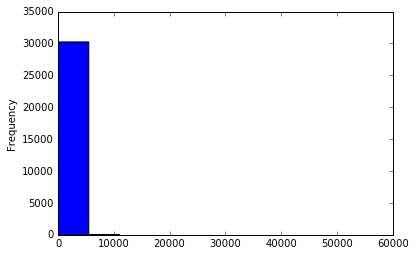

In [128]:
df1.tot_coll_amt.plot(kind='hist')

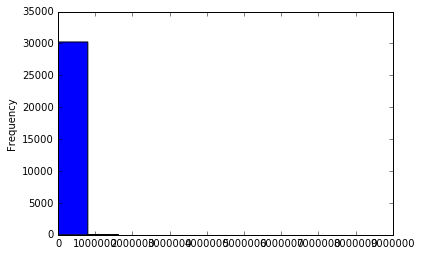

In [129]:
df1.tot_cur_bal.plot(kind='hist')

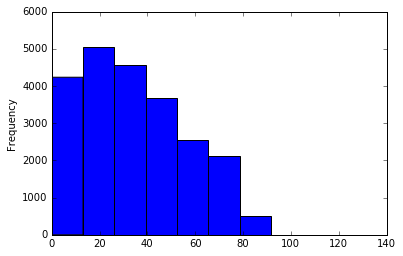

In [133]:
df1.mths_since_last_delinq.plot(kind='hist')

In [134]:
df1.mths_since_last_delinq.mean()

34.98760749724366

In [132]:
df1.mths_since_last_delinq.describe()

count    22675.000000
mean        34.987607
std         21.290163
min          0.000000
25%         17.000000
50%         32.000000
75%         50.000000
max        131.000000
Name: mths_since_last_delinq, dtype: float64

In [136]:
df1['mths_since_last_delinq']=df1.mths_since_last_delinq.fillna(df1.mths_since_last_delinq.mean())

In [138]:
df1.mths_since_last_delinq.describe()

count    46572.000000
mean        34.987607
std         14.855432
min          0.000000
25%         33.000000
50%         34.987607
75%         34.987607
max        131.000000
Name: mths_since_last_delinq, dtype: float64

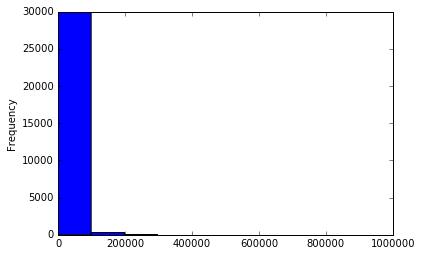

In [142]:
df1.total_rev_hi_lim.plot(kind='hist')

In [146]:

del df1['tot_coll_amt']

In [147]:
del df1['total_rev_hi_lim']

In [148]:
df1.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_cur_bal,issue_year
2,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,...,0.0,2014-06-01,649.91,2016-01-01,0.0,1.0,INDIVIDUAL,0.0,NaN,2011
3,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,...,0.0,2015-01-01,357.48,2015-01-01,0.0,1.0,INDIVIDUAL,0.0,NaN,2011
10,6500.0,6500.0,6500.0,60 months,14.65,153.45,C,C3,5 years,OWN,...,0.0,2013-06-01,1655.54,2015-12-01,0.0,1.0,INDIVIDUAL,0.0,NaN,2011
15,1000.0,1000.0,1000.0,36 months,16.29,35.31,D,D1,< 1 year,RENT,...,0.0,2015-01-01,36.32,2016-01-01,0.0,1.0,INDIVIDUAL,0.0,NaN,2011
16,10000.0,10000.0,10000.0,36 months,15.27,347.98,C,C4,4 years,RENT,...,0.0,2015-01-01,370.46,2015-04-01,0.0,1.0,INDIVIDUAL,0.0,NaN,2011


In [149]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46572 entries, 2 to 230654
Data columns (total 48 columns):
loan_amnt                     46572 non-null float64
funded_amnt                   46572 non-null float64
funded_amnt_inv               46572 non-null float64
term                          46572 non-null object
int_rate                      46572 non-null float64
installment                   46572 non-null float64
grade                         46572 non-null object
sub_grade                     46572 non-null object
emp_length                    46572 non-null object
home_ownership                46572 non-null object
annual_inc                    46572 non-null float64
verification_status           46572 non-null object
issue_d                       46572 non-null object
loan_status                   46572 non-null object
pymnt_plan                    46572 non-null object
url                           46572 non-null object
purpose                       46572 non-null object


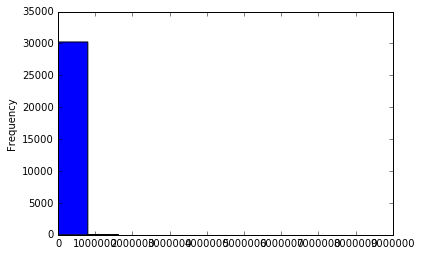

In [150]:
df1.tot_cur_bal.plot(kind='hist')

In [151]:
df1.tot_cur_bal.describe()

count    3.034000e+04
mean     1.219410e+05
std      1.509480e+05
min      0.000000e+00
25%      2.441900e+04
50%      5.959250e+04
75%      1.842302e+05
max      8.000078e+06
Name: tot_cur_bal, dtype: float64

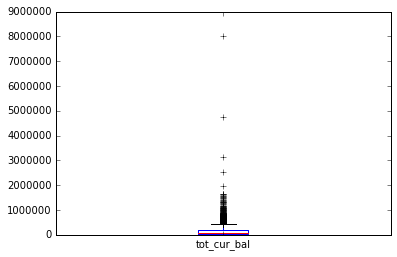

In [152]:
df1.tot_cur_bal.plot(kind='box')

In [154]:
del df1['tot_cur_bal']

In [155]:
df1.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,total_rec_late_fee,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,issue_year
2,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,...,0.00,0.0,2014-06-01,649.91,2016-01-01,0.0,1.0,INDIVIDUAL,0.0,2011
3,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,...,16.97,0.0,2015-01-01,357.48,2015-01-01,0.0,1.0,INDIVIDUAL,0.0,2011
10,6500.0,6500.0,6500.0,60 months,14.65,153.45,C,C3,5 years,OWN,...,0.00,0.0,2013-06-01,1655.54,2015-12-01,0.0,1.0,INDIVIDUAL,0.0,2011
15,1000.0,1000.0,1000.0,36 months,16.29,35.31,D,D1,< 1 year,RENT,...,0.00,0.0,2015-01-01,36.32,2016-01-01,0.0,1.0,INDIVIDUAL,0.0,2011
16,10000.0,10000.0,10000.0,36 months,15.27,347.98,C,C4,4 years,RENT,...,0.00,0.0,2015-01-01,370.46,2015-04-01,0.0,1.0,INDIVIDUAL,0.0,2011


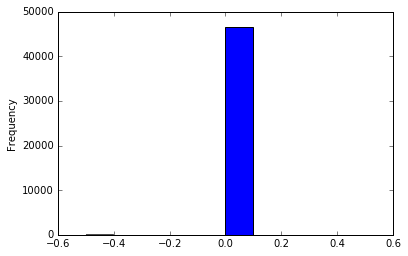

In [156]:
df1.collection_recovery_fee.plot(kind='hist')

In [157]:
del df1['collection_recovery_fee']

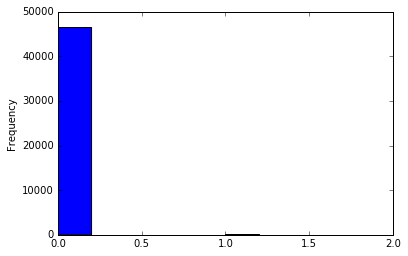

In [160]:
df1.collections_12_mths_ex_med.plot(kind='hist')

In [161]:
del df1['collections_12_mths_ex_med']

In [162]:
df1.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,total_rec_prncp,total_rec_int,total_rec_late_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,policy_code,application_type,acc_now_delinq,issue_year
2,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,...,2400.0,603.65,0.00,2014-06-01,649.91,2016-01-01,1.0,INDIVIDUAL,0.0,2011
3,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,...,10000.0,2209.33,16.97,2015-01-01,357.48,2015-01-01,1.0,INDIVIDUAL,0.0,2011
10,6500.0,6500.0,6500.0,60 months,14.65,153.45,C,C3,5 years,OWN,...,6500.0,1177.52,0.00,2013-06-01,1655.54,2015-12-01,1.0,INDIVIDUAL,0.0,2011
15,1000.0,1000.0,1000.0,36 months,16.29,35.31,D,D1,< 1 year,RENT,...,1000.0,270.17,0.00,2015-01-01,36.32,2016-01-01,1.0,INDIVIDUAL,0.0,2011
16,10000.0,10000.0,10000.0,36 months,15.27,347.98,C,C4,4 years,RENT,...,10000.0,2519.26,0.00,2015-01-01,370.46,2015-04-01,1.0,INDIVIDUAL,0.0,2011


In [164]:
del df1['policy_code']

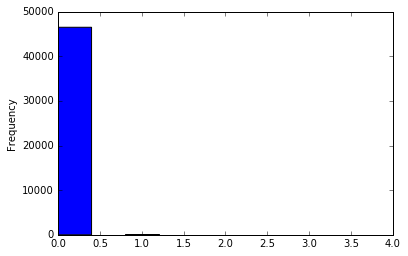

In [168]:
df1.acc_now_delinq.plot(kind='hist')

In [169]:
del df1['acc_now_delinq']

In [170]:
df1.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,application_type,issue_year
2,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,...,3003.653644,3003.65,2400.0,603.65,0.00,2014-06-01,649.91,2016-01-01,INDIVIDUAL,2011
3,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,...,12226.302212,12226.30,10000.0,2209.33,16.97,2015-01-01,357.48,2015-01-01,INDIVIDUAL,2011
10,6500.0,6500.0,6500.0,60 months,14.65,153.45,C,C3,5 years,OWN,...,7677.520000,7677.52,6500.0,1177.52,0.00,2013-06-01,1655.54,2015-12-01,INDIVIDUAL,2011
15,1000.0,1000.0,1000.0,36 months,16.29,35.31,D,D1,< 1 year,RENT,...,1270.171106,1270.17,1000.0,270.17,0.00,2015-01-01,36.32,2016-01-01,INDIVIDUAL,2011
16,10000.0,10000.0,10000.0,36 months,15.27,347.98,C,C4,4 years,RENT,...,12519.260450,12519.26,10000.0,2519.26,0.00,2015-01-01,370.46,2015-04-01,INDIVIDUAL,2011


In [179]:
del df1['total_rec_late_fee']

In [180]:
df1.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,application_type,issue_year
2,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,...,0.0,3003.653644,3003.65,2400.0,603.65,2014-06-01,649.91,2016-01-01,INDIVIDUAL,2011
3,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,...,0.0,12226.302212,12226.30,10000.0,2209.33,2015-01-01,357.48,2015-01-01,INDIVIDUAL,2011
10,6500.0,6500.0,6500.0,60 months,14.65,153.45,C,C3,5 years,OWN,...,0.0,7677.520000,7677.52,6500.0,1177.52,2013-06-01,1655.54,2015-12-01,INDIVIDUAL,2011
15,1000.0,1000.0,1000.0,36 months,16.29,35.31,D,D1,< 1 year,RENT,...,0.0,1270.171106,1270.17,1000.0,270.17,2015-01-01,36.32,2016-01-01,INDIVIDUAL,2011
16,10000.0,10000.0,10000.0,36 months,15.27,347.98,C,C4,4 years,RENT,...,0.0,12519.260450,12519.26,10000.0,2519.26,2015-01-01,370.46,2015-04-01,INDIVIDUAL,2011


In [184]:
del df1['out_prncp_inv']

In [185]:
df1.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,out_prncp,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,application_type,issue_year
2,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,...,0.0,3003.653644,3003.65,2400.0,603.65,2014-06-01,649.91,2016-01-01,INDIVIDUAL,2011
3,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,...,0.0,12226.302212,12226.30,10000.0,2209.33,2015-01-01,357.48,2015-01-01,INDIVIDUAL,2011
10,6500.0,6500.0,6500.0,60 months,14.65,153.45,C,C3,5 years,OWN,...,0.0,7677.520000,7677.52,6500.0,1177.52,2013-06-01,1655.54,2015-12-01,INDIVIDUAL,2011
15,1000.0,1000.0,1000.0,36 months,16.29,35.31,D,D1,< 1 year,RENT,...,0.0,1270.171106,1270.17,1000.0,270.17,2015-01-01,36.32,2016-01-01,INDIVIDUAL,2011
16,10000.0,10000.0,10000.0,36 months,15.27,347.98,C,C4,4 years,RENT,...,0.0,12519.260450,12519.26,10000.0,2519.26,2015-01-01,370.46,2015-04-01,INDIVIDUAL,2011


In [186]:
del df1['out_prncp']

In [187]:
df1.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,initial_list_status,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,application_type,issue_year
2,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,...,f,3003.653644,3003.65,2400.0,603.65,2014-06-01,649.91,2016-01-01,INDIVIDUAL,2011
3,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,...,f,12226.302212,12226.30,10000.0,2209.33,2015-01-01,357.48,2015-01-01,INDIVIDUAL,2011
10,6500.0,6500.0,6500.0,60 months,14.65,153.45,C,C3,5 years,OWN,...,f,7677.520000,7677.52,6500.0,1177.52,2013-06-01,1655.54,2015-12-01,INDIVIDUAL,2011
15,1000.0,1000.0,1000.0,36 months,16.29,35.31,D,D1,< 1 year,RENT,...,f,1270.171106,1270.17,1000.0,270.17,2015-01-01,36.32,2016-01-01,INDIVIDUAL,2011
16,10000.0,10000.0,10000.0,36 months,15.27,347.98,C,C4,4 years,RENT,...,f,12519.260450,12519.26,10000.0,2519.26,2015-01-01,370.46,2015-04-01,INDIVIDUAL,2011


In [195]:
df1.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,...,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_amnt,issue_year
count,46572.000000,46572.000000,46572.000000,46572.000000,46572.000000,4.657200e+04,46572.000000,46572.000000,46572.000000,46572.000000,...,46572.000000,46572.000000,46517.000000,46572.000000,46572.000000,46572.000000,46572.000000,46572.000000,46572.000000,46572.000000
mean,13200.676909,13162.699691,13087.286137,16.081714,419.987670,7.026099e+04,16.429467,0.266727,1.022825,34.987607,...,0.111999,14931.385575,62.705917,23.748518,15898.391013,15802.600574,13157.702974,2740.111133,6528.958313,2012.153869
std,8138.306162,8104.508107,8096.938253,1.892321,253.257082,5.944030e+04,7.437970,0.738467,1.070999,14.855432,...,0.373588,17216.534759,22.512268,11.475581,9958.553107,9946.433068,8102.871125,2252.460556,6838.857913,1.079791
min,1000.000000,1000.000000,209.198360,6.000000,22.940000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,1011.170000,224.420000,999.950000,11.170000,0.070000,2009.000000
25%,7000.000000,7000.000000,7000.000000,14.330000,240.370000,4.300000e+04,10.890000,0.000000,0.000000,33.000000,...,0.000000,6218.000000,47.900000,15.000000,8461.455000,8345.350000,7000.000000,1128.145000,824.352500,2012.000000
50%,11200.000000,11200.000000,11100.000000,15.800000,363.820000,6.000000e+04,16.200000,0.000000,1.000000,34.987607,...,0.000000,11081.000000,65.500000,22.000000,13308.537894,13183.830000,11200.000000,2135.225000,4349.265000,2012.000000
75%,18000.000000,18000.000000,17975.000000,17.580000,538.400000,8.400000e+04,21.692500,0.000000,2.000000,34.987607,...,0.000000,18913.250000,80.600000,31.000000,21486.212500,21307.620000,18000.000000,3687.015000,9895.760000,2013.000000
max,35000.000000,35000.000000,35000.000000,20.310000,1306.270000,6.000000e+06,34.990000,29.000000,8.000000,131.000000,...,10.000000,975800.000000,122.500000,87.000000,51921.657702,51847.540000,35000.030000,16921.660000,36115.200000,2013.000000


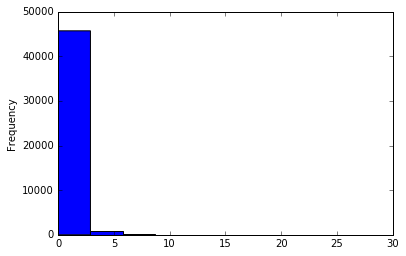

In [198]:
df1.delinq_2yrs.plot(kind='hist')

In [201]:
df1['issue_year']=pd.to_datetime(df['issue_d'])

In [202]:
df1.issue_year

2        2011-12-01
3        2011-12-01
10       2011-12-01
15       2011-12-01
16       2011-12-01
20       2011-12-01
34       2011-12-01
42       2011-12-01
43       2011-12-01
59       2011-12-01
62       2011-12-01
63       2011-12-01
67       2011-12-01
69       2011-12-01
70       2011-12-01
72       2011-12-01
73       2011-12-01
75       2011-12-01
76       2011-12-01
80       2011-12-01
81       2011-12-01
88       2011-12-01
89       2011-12-01
107      2011-12-01
108      2011-12-01
126      2011-12-01
133      2011-12-01
142      2011-12-01
149      2011-12-01
150      2011-12-01
            ...    
230531   2012-01-01
230535   2012-01-01
230537   2012-01-01
230539   2012-01-01
230540   2012-01-01
230544   2012-01-01
230545   2012-01-01
230547   2012-01-01
230559   2012-01-01
230560   2012-01-01
230564   2012-01-01
230568   2012-01-01
230583   2012-01-01
230588   2012-01-01
230592   2012-01-01
230598   2012-01-01
230600   2012-01-01
230601   2012-01-01
230605   2012-01-01


In [203]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46572 entries, 2 to 230654
Data columns (total 40 columns):
loan_amnt                 46572 non-null float64
funded_amnt               46572 non-null float64
funded_amnt_inv           46572 non-null float64
term                      46572 non-null object
int_rate                  46572 non-null float64
installment               46572 non-null float64
grade                     46572 non-null object
sub_grade                 46572 non-null object
emp_length                46572 non-null object
home_ownership            46572 non-null object
annual_inc                46572 non-null float64
verification_status       46572 non-null object
issue_d                   46572 non-null object
loan_status               46572 non-null object
pymnt_plan                46572 non-null object
url                       46572 non-null object
purpose                   46572 non-null object
title                     46567 non-null object
zip_code            

In [207]:
df1['title']=df1.title.fillna('unknown')

In [209]:
df1['title']=df1.title.apply(lambda x:x.lower())

In [210]:
df1.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,initial_list_status,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,application_type,issue_year
2,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,...,f,3003.653644,3003.65,2400.0,603.65,2014-06-01,649.91,2016-01-01,INDIVIDUAL,2011-12-01
3,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,...,f,12226.302212,12226.30,10000.0,2209.33,2015-01-01,357.48,2015-01-01,INDIVIDUAL,2011-12-01
10,6500.0,6500.0,6500.0,60 months,14.65,153.45,C,C3,5 years,OWN,...,f,7677.520000,7677.52,6500.0,1177.52,2013-06-01,1655.54,2015-12-01,INDIVIDUAL,2011-12-01
15,1000.0,1000.0,1000.0,36 months,16.29,35.31,D,D1,< 1 year,RENT,...,f,1270.171106,1270.17,1000.0,270.17,2015-01-01,36.32,2016-01-01,INDIVIDUAL,2011-12-01
16,10000.0,10000.0,10000.0,36 months,15.27,347.98,C,C4,4 years,RENT,...,f,12519.260450,12519.26,10000.0,2519.26,2015-01-01,370.46,2015-04-01,INDIVIDUAL,2011-12-01


In [211]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46572 entries, 2 to 230654
Data columns (total 40 columns):
loan_amnt                 46572 non-null float64
funded_amnt               46572 non-null float64
funded_amnt_inv           46572 non-null float64
term                      46572 non-null object
int_rate                  46572 non-null float64
installment               46572 non-null float64
grade                     46572 non-null object
sub_grade                 46572 non-null object
emp_length                46572 non-null object
home_ownership            46572 non-null object
annual_inc                46572 non-null float64
verification_status       46572 non-null object
issue_d                   46572 non-null object
loan_status               46572 non-null object
pymnt_plan                46572 non-null object
url                       46572 non-null object
purpose                   46572 non-null object
title                     46572 non-null object
zip_code            

In [212]:
df1.revol_util

2         98.5
3         21.0
10        20.6
15        81.5
16        70.2
20        85.6
34        60.5
42        98.1
43        99.0
59        91.2
62        57.4
63        66.9
67        83.4
69        79.5
70        79.4
72        83.2
73        97.0
75        78.5
76        65.0
80        53.3
81        81.3
88        96.4
89        27.6
107       83.8
108       91.5
126       37.7
133       33.3
142       70.8
149       83.5
150       61.4
          ... 
230531    77.2
230535    70.4
230537    61.4
230539    95.0
230540    49.4
230544    81.3
230545    92.3
230547    75.6
230559    69.8
230560    86.7
230564    87.1
230568    99.3
230583    89.3
230588    63.4
230592    67.9
230598    39.4
230600    91.6
230601    87.0
230605    84.3
230610    89.4
230619    79.5
230626    58.9
230627    80.2
230628    32.4
230629    81.9
230640    99.0
230649    71.3
230652    58.4
230653    33.1
230654    62.4
Name: revol_util, dtype: float64

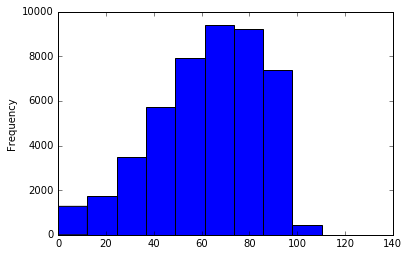

In [213]:
df1.revol_util.plot(kind='hist')

In [215]:
df1['revol_util']=df1.revol_util.fillna(df1.revol_util.mean())

In [216]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46572 entries, 2 to 230654
Data columns (total 40 columns):
loan_amnt                 46572 non-null float64
funded_amnt               46572 non-null float64
funded_amnt_inv           46572 non-null float64
term                      46572 non-null object
int_rate                  46572 non-null float64
installment               46572 non-null float64
grade                     46572 non-null object
sub_grade                 46572 non-null object
emp_length                46572 non-null object
home_ownership            46572 non-null object
annual_inc                46572 non-null float64
verification_status       46572 non-null object
issue_d                   46572 non-null object
loan_status               46572 non-null object
pymnt_plan                46572 non-null object
url                       46572 non-null object
purpose                   46572 non-null object
title                     46572 non-null object
zip_code            

In [219]:
df1['last_credit_pull_d']=df1.last_credit_pull_d.fillna(df1.last_credit_pull_d.mode())

In [220]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46572 entries, 2 to 230654
Data columns (total 40 columns):
loan_amnt                 46572 non-null float64
funded_amnt               46572 non-null float64
funded_amnt_inv           46572 non-null float64
term                      46572 non-null object
int_rate                  46572 non-null float64
installment               46572 non-null float64
grade                     46572 non-null object
sub_grade                 46572 non-null object
emp_length                46572 non-null object
home_ownership            46572 non-null object
annual_inc                46572 non-null float64
verification_status       46572 non-null object
issue_d                   46572 non-null object
loan_status               46572 non-null object
pymnt_plan                46572 non-null object
url                       46572 non-null object
purpose                   46572 non-null object
title                     46572 non-null object
zip_code            

In [221]:
df1.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,initial_list_status,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,application_type,issue_year
2,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,...,f,3003.653644,3003.65,2400.0,603.65,2014-06-01,649.91,2016-01-01,INDIVIDUAL,2011-12-01
3,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,...,f,12226.302212,12226.30,10000.0,2209.33,2015-01-01,357.48,2015-01-01,INDIVIDUAL,2011-12-01
10,6500.0,6500.0,6500.0,60 months,14.65,153.45,C,C3,5 years,OWN,...,f,7677.520000,7677.52,6500.0,1177.52,2013-06-01,1655.54,2015-12-01,INDIVIDUAL,2011-12-01
15,1000.0,1000.0,1000.0,36 months,16.29,35.31,D,D1,< 1 year,RENT,...,f,1270.171106,1270.17,1000.0,270.17,2015-01-01,36.32,2016-01-01,INDIVIDUAL,2011-12-01
16,10000.0,10000.0,10000.0,36 months,15.27,347.98,C,C4,4 years,RENT,...,f,12519.260450,12519.26,10000.0,2519.26,2015-01-01,370.46,2015-04-01,INDIVIDUAL,2011-12-01


In [225]:
def parse(x):
    x=x.split()
    x=int(x[0])
    return x
df1['term']=df1.term.apply(parse)

In [226]:
df1.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,application_type,issue_year,term_months
2,2400.0,2400.0,2400.0,36,15.96,84.33,C,C5,10+ years,RENT,...,3003.653644,3003.65,2400.0,603.65,2014-06-01,649.91,2016-01-01,INDIVIDUAL,2011-12-01,36
3,10000.0,10000.0,10000.0,36,13.49,339.31,C,C1,10+ years,RENT,...,12226.302212,12226.30,10000.0,2209.33,2015-01-01,357.48,2015-01-01,INDIVIDUAL,2011-12-01,36
10,6500.0,6500.0,6500.0,60,14.65,153.45,C,C3,5 years,OWN,...,7677.520000,7677.52,6500.0,1177.52,2013-06-01,1655.54,2015-12-01,INDIVIDUAL,2011-12-01,60
15,1000.0,1000.0,1000.0,36,16.29,35.31,D,D1,< 1 year,RENT,...,1270.171106,1270.17,1000.0,270.17,2015-01-01,36.32,2016-01-01,INDIVIDUAL,2011-12-01,36
16,10000.0,10000.0,10000.0,36,15.27,347.98,C,C4,4 years,RENT,...,12519.260450,12519.26,10000.0,2519.26,2015-01-01,370.46,2015-04-01,INDIVIDUAL,2011-12-01,36


In [228]:
del df1['term_months']

In [230]:
df1['home_ownership']=df1.home_ownership.apply(lambda x:x.lower())

In [234]:
df1.home_ownership.unique()

array(['rent', 'own', 'mortgage', 'other', 'none'], dtype=object)

In [237]:
del df1['application_type']

In [238]:
df1.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,total_acc,initial_list_status,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,issue_year
2,2400.0,2400.0,2400.0,36,15.96,84.33,C,C5,10+ years,rent,...,10.0,f,3003.653644,3003.65,2400.0,603.65,2014-06-01,649.91,2016-01-01,2011-12-01
3,10000.0,10000.0,10000.0,36,13.49,339.31,C,C1,10+ years,rent,...,37.0,f,12226.302212,12226.30,10000.0,2209.33,2015-01-01,357.48,2015-01-01,2011-12-01
10,6500.0,6500.0,6500.0,60,14.65,153.45,C,C3,5 years,own,...,23.0,f,7677.520000,7677.52,6500.0,1177.52,2013-06-01,1655.54,2015-12-01,2011-12-01
15,1000.0,1000.0,1000.0,36,16.29,35.31,D,D1,< 1 year,rent,...,23.0,f,1270.171106,1270.17,1000.0,270.17,2015-01-01,36.32,2016-01-01,2011-12-01
16,10000.0,10000.0,10000.0,36,15.27,347.98,C,C4,4 years,rent,...,28.0,f,12519.260450,12519.26,10000.0,2519.26,2015-01-01,370.46,2015-04-01,2011-12-01


In [239]:
df1.emp_length.unique()

array(['10+ years', '5 years', '< 1 year', '4 years', '3 years', '7 years',
       '9 years', '1 year', '2 years', '6 years', 'n/a', '8 years'], dtype=object)

In [240]:
df1['emp_length']=df1.emp_length.replace(['10+ years','< 1 year','n/a'],['10 years','0 years','0 years'])

In [241]:
df1.emp_length.unique()

array(['10 years', '5 years', '0 years', '4 years', '3 years', '7 years',
       '9 years', '1 year', '2 years', '6 years', '8 years'], dtype=object)

In [242]:
df1['emp_length']=df1.emp_length.apply(parse)

In [243]:
df1.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,total_acc,initial_list_status,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,issue_year
2,2400.0,2400.0,2400.0,36,15.96,84.33,C,C5,10,rent,...,10.0,f,3003.653644,3003.65,2400.0,603.65,2014-06-01,649.91,2016-01-01,2011-12-01
3,10000.0,10000.0,10000.0,36,13.49,339.31,C,C1,10,rent,...,37.0,f,12226.302212,12226.30,10000.0,2209.33,2015-01-01,357.48,2015-01-01,2011-12-01
10,6500.0,6500.0,6500.0,60,14.65,153.45,C,C3,5,own,...,23.0,f,7677.520000,7677.52,6500.0,1177.52,2013-06-01,1655.54,2015-12-01,2011-12-01
15,1000.0,1000.0,1000.0,36,16.29,35.31,D,D1,0,rent,...,23.0,f,1270.171106,1270.17,1000.0,270.17,2015-01-01,36.32,2016-01-01,2011-12-01
16,10000.0,10000.0,10000.0,36,15.27,347.98,C,C4,4,rent,...,28.0,f,12519.260450,12519.26,10000.0,2519.26,2015-01-01,370.46,2015-04-01,2011-12-01


In [244]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46572 entries, 2 to 230654
Data columns (total 39 columns):
loan_amnt                 46572 non-null float64
funded_amnt               46572 non-null float64
funded_amnt_inv           46572 non-null float64
term                      46572 non-null int64
int_rate                  46572 non-null float64
installment               46572 non-null float64
grade                     46572 non-null object
sub_grade                 46572 non-null object
emp_length                46572 non-null int64
home_ownership            46572 non-null object
annual_inc                46572 non-null float64
verification_status       46572 non-null object
issue_d                   46572 non-null object
loan_status               46572 non-null object
pymnt_plan                46572 non-null object
url                       46572 non-null object
purpose                   46572 non-null object
title                     46572 non-null object
zip_code              

In [245]:
del df1['url']

In [246]:
df1.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,total_acc,initial_list_status,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,issue_year
2,2400.0,2400.0,2400.0,36,15.96,84.33,C,C5,10,rent,...,10.0,f,3003.653644,3003.65,2400.0,603.65,2014-06-01,649.91,2016-01-01,2011-12-01
3,10000.0,10000.0,10000.0,36,13.49,339.31,C,C1,10,rent,...,37.0,f,12226.302212,12226.30,10000.0,2209.33,2015-01-01,357.48,2015-01-01,2011-12-01
10,6500.0,6500.0,6500.0,60,14.65,153.45,C,C3,5,own,...,23.0,f,7677.520000,7677.52,6500.0,1177.52,2013-06-01,1655.54,2015-12-01,2011-12-01
15,1000.0,1000.0,1000.0,36,16.29,35.31,D,D1,0,rent,...,23.0,f,1270.171106,1270.17,1000.0,270.17,2015-01-01,36.32,2016-01-01,2011-12-01
16,10000.0,10000.0,10000.0,36,15.27,347.98,C,C4,4,rent,...,28.0,f,12519.260450,12519.26,10000.0,2519.26,2015-01-01,370.46,2015-04-01,2011-12-01


In [247]:
df1.purpose

2             small_business
3                      other
10        debt_consolidation
15        debt_consolidation
16          home_improvement
20        debt_consolidation
34               credit_card
42                     other
43        debt_consolidation
59        debt_consolidation
62        debt_consolidation
63        debt_consolidation
67        debt_consolidation
69               credit_card
70               credit_card
72        debt_consolidation
73               credit_card
75        debt_consolidation
76        debt_consolidation
80          home_improvement
81               credit_card
88        debt_consolidation
89        debt_consolidation
107       debt_consolidation
108       debt_consolidation
126       debt_consolidation
133       debt_consolidation
142       debt_consolidation
149       debt_consolidation
150              credit_card
                 ...        
230531    debt_consolidation
230535    debt_consolidation
230537           credit_card
230539        

In [248]:
df1.title

2               real estate business
3                           personel
10        high intrest consolidation
15           debt consolidation loan
16                              home
20         freedom from credit cards
34                  credit card loan
42                  year end cleanup
43                              debt
59                to pay of all debt
62           debt consolidation loan
63           debt consolidation loan
67                         new start
69                  credit refinance
70                    refinance loan
72         credit card consolidation
73         credit card consolidation
75           debt consolidation loan
76                debt consolidation
80                  home improvement
81                      cc refi loan
88                       loan payoff
89                   make on payment
107                     smaller loan
108                      consolidate
126                            money
133               debt consolidation
1

In [249]:
df1.addr_state

2         IL
3         CA
10        AZ
15        MO
16        CA
20        TX
34        CA
42        PA
43        RI
59        TX
62        WI
63        VA
67        CA
69        FL
70        GA
72        AL
73        MA
75        NJ
76        TX
80        NY
81        PA
88        AZ
89        CA
107       CA
108       AZ
126       FL
133       PA
142       CA
149       IL
150       OH
          ..
230531    MD
230535    AZ
230537    MO
230539    CA
230540    CA
230544    FL
230545    WI
230547    TX
230559    NC
230560    NJ
230564    OH
230568    IL
230583    CA
230588    CA
230592    TX
230598    NY
230600    CO
230601    MN
230605    NC
230610    WI
230619    NC
230626    GA
230627    TX
230628    WA
230629    FL
230640    NV
230649    CA
230652    NY
230653    CA
230654    CA
Name: addr_state, dtype: object

In [254]:
test = df1.loc[0::,['addr_state','sub_grade']]

In [286]:
test_grp = test.groupby(['addr_state','sub_grade'])

In [287]:
test_grp['sub_grade'].count()

addr_state  sub_grade
AK          C1           18
            C2           18
            C3           18
            C4           13
            C5            9
            D1           14
            D2           14
            D3           20
            D4            8
            D5            6
AL          C1           80
            C2           67
            C3           66
            C4           74
            C5           52
            D1           56
            D2           42
            D3           37
            D4           33
            D5           31
AR          C1           47
            C2           57
            C3           34
            C4           34
            C5           32
            D1           38
            D2           32
            D3           33
            D4           19
            D5           10
                         ..
WI          C1           86
            C2           80
            C3           61
            C4           6

In [288]:
df1.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,total_acc,initial_list_status,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,issue_year
2,2400.0,2400.0,2400.0,36,15.96,84.33,C,C5,10,rent,...,10.0,f,3003.653644,3003.65,2400.0,603.65,2014-06-01,649.91,2016-01-01,2011-12-01
3,10000.0,10000.0,10000.0,36,13.49,339.31,C,C1,10,rent,...,37.0,f,12226.302212,12226.30,10000.0,2209.33,2015-01-01,357.48,2015-01-01,2011-12-01
10,6500.0,6500.0,6500.0,60,14.65,153.45,C,C3,5,own,...,23.0,f,7677.520000,7677.52,6500.0,1177.52,2013-06-01,1655.54,2015-12-01,2011-12-01
15,1000.0,1000.0,1000.0,36,16.29,35.31,D,D1,0,rent,...,23.0,f,1270.171106,1270.17,1000.0,270.17,2015-01-01,36.32,2016-01-01,2011-12-01
16,10000.0,10000.0,10000.0,36,15.27,347.98,C,C4,4,rent,...,28.0,f,12519.260450,12519.26,10000.0,2519.26,2015-01-01,370.46,2015-04-01,2011-12-01


In [289]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46572 entries, 2 to 230654
Data columns (total 38 columns):
loan_amnt                 46572 non-null float64
funded_amnt               46572 non-null float64
funded_amnt_inv           46572 non-null float64
term                      46572 non-null int64
int_rate                  46572 non-null float64
installment               46572 non-null float64
grade                     46572 non-null object
sub_grade                 46572 non-null object
emp_length                46572 non-null int64
home_ownership            46572 non-null object
annual_inc                46572 non-null float64
verification_status       46572 non-null object
issue_d                   46572 non-null object
loan_status               46572 non-null object
pymnt_plan                46572 non-null object
purpose                   46572 non-null object
title                     46572 non-null object
zip_code                  46572 non-null object
addr_state            

In [290]:
#How does int_rate vary with states
state_int = df1.loc[0::,['addr_state','int_rate']]

In [291]:
state_int_grp = state_int.groupby('addr_state')

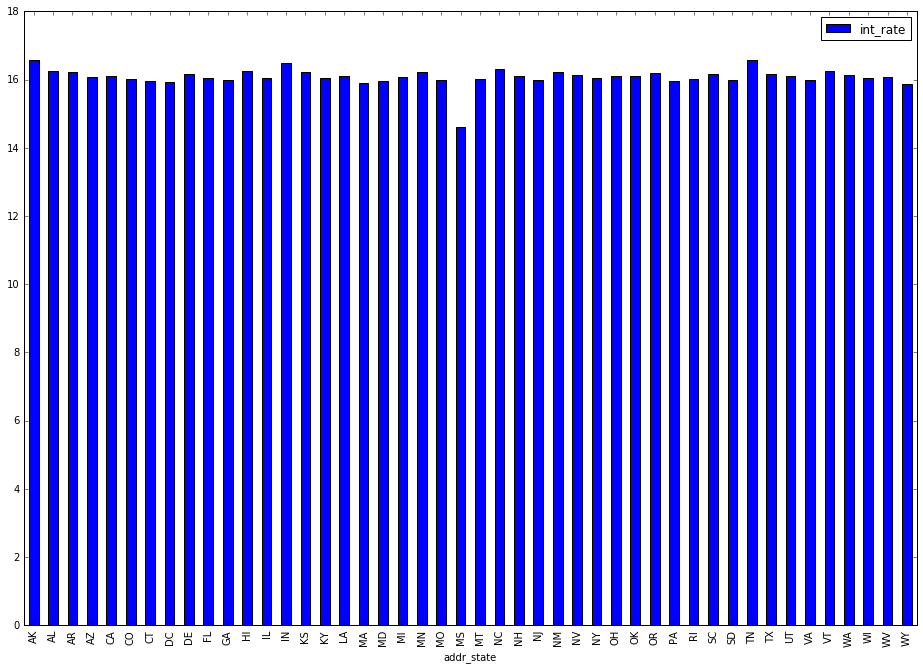

In [337]:
state_int_grp.mean().plot(kind='bar',figsize=(16,11))

In [298]:
df1.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,total_acc,initial_list_status,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,issue_year
2,2400.0,2400.0,2400.0,36,15.96,84.33,C,C5,10,rent,...,10.0,f,3003.653644,3003.65,2400.0,603.65,2014-06-01,649.91,2016-01-01,2011-12-01
3,10000.0,10000.0,10000.0,36,13.49,339.31,C,C1,10,rent,...,37.0,f,12226.302212,12226.30,10000.0,2209.33,2015-01-01,357.48,2015-01-01,2011-12-01
10,6500.0,6500.0,6500.0,60,14.65,153.45,C,C3,5,own,...,23.0,f,7677.520000,7677.52,6500.0,1177.52,2013-06-01,1655.54,2015-12-01,2011-12-01
15,1000.0,1000.0,1000.0,36,16.29,35.31,D,D1,0,rent,...,23.0,f,1270.171106,1270.17,1000.0,270.17,2015-01-01,36.32,2016-01-01,2011-12-01
16,10000.0,10000.0,10000.0,36,15.27,347.98,C,C4,4,rent,...,28.0,f,12519.260450,12519.26,10000.0,2519.26,2015-01-01,370.46,2015-04-01,2011-12-01


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000000C33E7B70>], dtype=object)

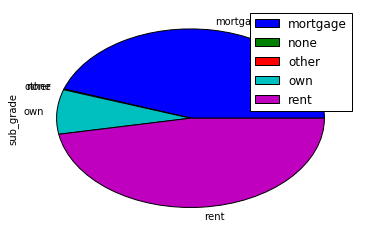

In [313]:
#How does home ownership affect grade
sub_own = df1.loc[0::,['sub_grade','home_ownership']]
sub_own_grp = sub_own.groupby(['home_ownership'])
sub_own_grp.count().plot(kind='pie',subplots=True)

In [314]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46572 entries, 2 to 230654
Data columns (total 38 columns):
loan_amnt                 46572 non-null float64
funded_amnt               46572 non-null float64
funded_amnt_inv           46572 non-null float64
term                      46572 non-null int64
int_rate                  46572 non-null float64
installment               46572 non-null float64
grade                     46572 non-null object
sub_grade                 46572 non-null object
emp_length                46572 non-null int64
home_ownership            46572 non-null object
annual_inc                46572 non-null float64
verification_status       46572 non-null object
issue_d                   46572 non-null object
loan_status               46572 non-null object
pymnt_plan                46572 non-null object
purpose                   46572 non-null object
title                     46572 non-null object
zip_code                  46572 non-null object
addr_state            

In [315]:
#Does payment plan lower interest rate and installment size
plan_rate = df1.loc[0::,['pymnt_plan','installment','int_rate']]

In [316]:
plan_rate_grp = plan_rate.groupby('pymnt_plan')

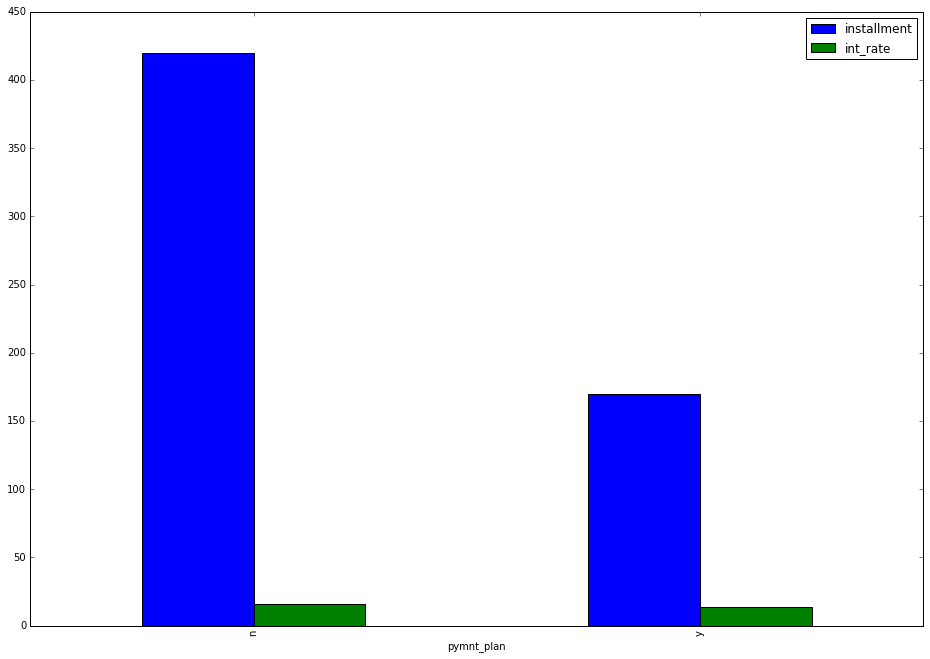

In [334]:
plan_rate_grp.mean().plot(kind='bar',figsize=(16,11))

In [319]:
df1.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,total_acc,initial_list_status,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,issue_year
2,2400.0,2400.0,2400.0,36,15.96,84.33,C,C5,10,rent,...,10.0,f,3003.653644,3003.65,2400.0,603.65,2014-06-01,649.91,2016-01-01,2011-12-01
3,10000.0,10000.0,10000.0,36,13.49,339.31,C,C1,10,rent,...,37.0,f,12226.302212,12226.30,10000.0,2209.33,2015-01-01,357.48,2015-01-01,2011-12-01
10,6500.0,6500.0,6500.0,60,14.65,153.45,C,C3,5,own,...,23.0,f,7677.520000,7677.52,6500.0,1177.52,2013-06-01,1655.54,2015-12-01,2011-12-01
15,1000.0,1000.0,1000.0,36,16.29,35.31,D,D1,0,rent,...,23.0,f,1270.171106,1270.17,1000.0,270.17,2015-01-01,36.32,2016-01-01,2011-12-01
16,10000.0,10000.0,10000.0,36,15.27,347.98,C,C4,4,rent,...,28.0,f,12519.260450,12519.26,10000.0,2519.26,2015-01-01,370.46,2015-04-01,2011-12-01


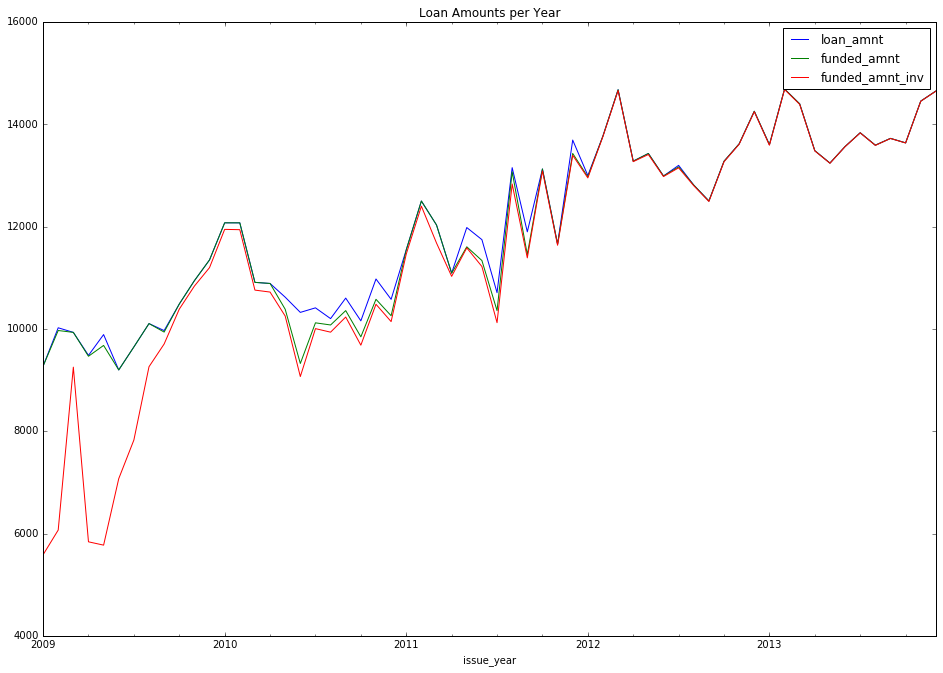

In [333]:
#Date vs loan amounts
date_amnt = df1.loc[0::,['loan_amnt','funded_amnt','funded_amnt_inv','issue_year']]
date_amnt_grp = date_amnt.groupby('issue_year')
date_amnt_grp.mean().plot(kind='line',title='Loan Amounts per Year',figsize=(16,11))

In [335]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46572 entries, 2 to 230654
Data columns (total 38 columns):
loan_amnt                 46572 non-null float64
funded_amnt               46572 non-null float64
funded_amnt_inv           46572 non-null float64
term                      46572 non-null int64
int_rate                  46572 non-null float64
installment               46572 non-null float64
grade                     46572 non-null object
sub_grade                 46572 non-null object
emp_length                46572 non-null int64
home_ownership            46572 non-null object
annual_inc                46572 non-null float64
verification_status       46572 non-null object
issue_d                   46572 non-null object
loan_status               46572 non-null object
pymnt_plan                46572 non-null object
purpose                   46572 non-null object
title                     46572 non-null object
zip_code                  46572 non-null object
addr_state            

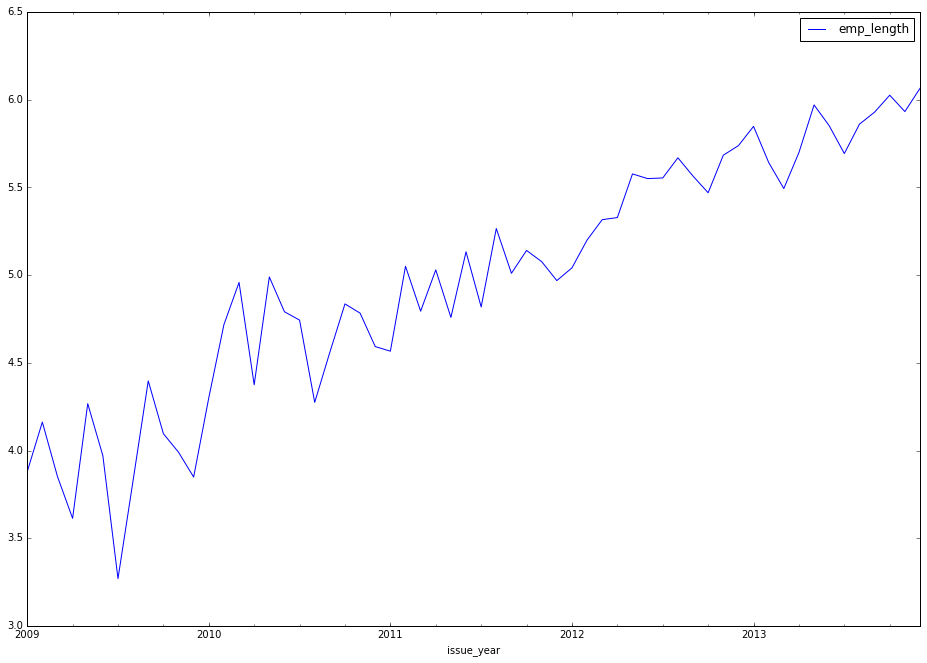

In [336]:
#emp_length vs year
emp_date = df1.loc[0::,['emp_length','issue_year']]
emp_date_grp = emp_date.groupby('issue_year')
emp_date_grp.mean().plot(kind='line',figsize=(16,11))

In [344]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46572 entries, 2 to 230654
Data columns (total 38 columns):
loan_amnt                 46572 non-null float64
funded_amnt               46572 non-null float64
funded_amnt_inv           46572 non-null float64
term                      46572 non-null int64
int_rate                  46572 non-null float64
installment               46572 non-null float64
grade                     46572 non-null object
sub_grade                 46572 non-null object
emp_length                46572 non-null int64
home_ownership            46572 non-null object
annual_inc                46572 non-null float64
verification_status       46572 non-null object
issue_d                   46572 non-null object
loan_status               46572 non-null object
pymnt_plan                46572 non-null object
purpose                   46572 non-null object
title                     46572 non-null object
zip_code                  46572 non-null object
addr_state            

In [346]:
df1['earliest_cr_line']=pd.to_datetime(df1.earliest_cr_line)

In [347]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46572 entries, 2 to 230654
Data columns (total 38 columns):
loan_amnt                 46572 non-null float64
funded_amnt               46572 non-null float64
funded_amnt_inv           46572 non-null float64
term                      46572 non-null int64
int_rate                  46572 non-null float64
installment               46572 non-null float64
grade                     46572 non-null object
sub_grade                 46572 non-null object
emp_length                46572 non-null int64
home_ownership            46572 non-null object
annual_inc                46572 non-null float64
verification_status       46572 non-null object
issue_d                   46572 non-null object
loan_status               46572 non-null object
pymnt_plan                46572 non-null object
purpose                   46572 non-null object
title                     46572 non-null object
zip_code                  46572 non-null object
addr_state            

In [348]:
delinq_sub = df1.loc[0::,['delinq_2yrs','sub_grade']]

In [349]:
delinq_sub_grp = delinq_sub.groupby('sub_grade')

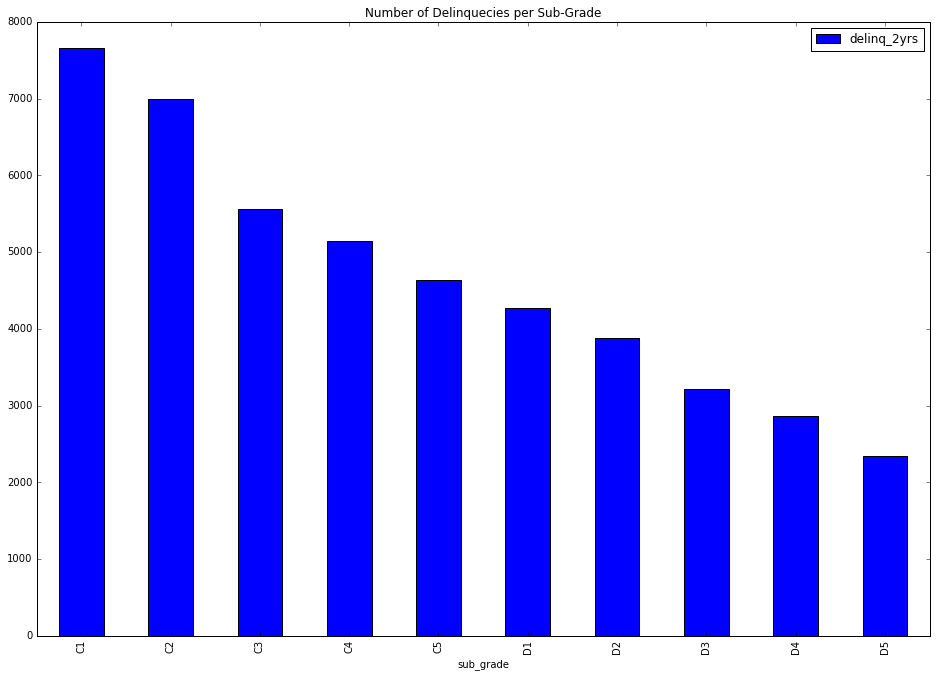

In [354]:
delinq_sub_grp.count().plot(kind='bar',title='Number of Delinquecies per Sub-Grade',figsize=(16,11))

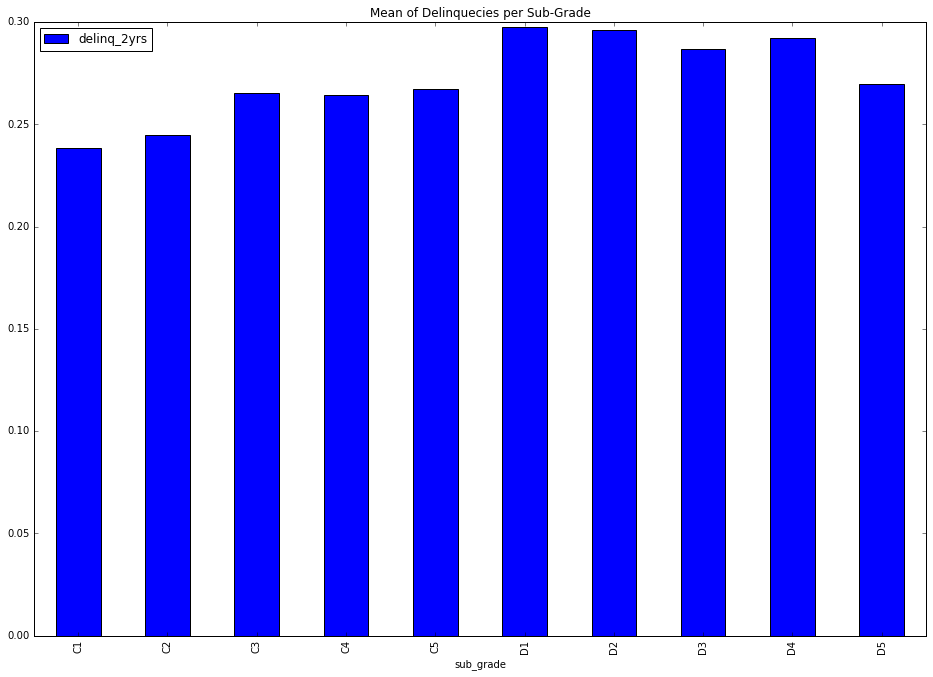

In [355]:
delinq_sub_grp.mean().plot(kind='bar',title='Mean of Delinquecies per Sub-Grade',figsize=(16,11))

In [356]:
df1.delinq_2yrs.describe()

count    46572.000000
mean         0.266727
std          0.738467
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         29.000000
Name: delinq_2yrs, dtype: float64

In [357]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46572 entries, 2 to 230654
Data columns (total 38 columns):
loan_amnt                 46572 non-null float64
funded_amnt               46572 non-null float64
funded_amnt_inv           46572 non-null float64
term                      46572 non-null int64
int_rate                  46572 non-null float64
installment               46572 non-null float64
grade                     46572 non-null object
sub_grade                 46572 non-null object
emp_length                46572 non-null int64
home_ownership            46572 non-null object
annual_inc                46572 non-null float64
verification_status       46572 non-null object
issue_d                   46572 non-null object
loan_status               46572 non-null object
pymnt_plan                46572 non-null object
purpose                   46572 non-null object
title                     46572 non-null object
zip_code                  46572 non-null object
addr_state            

In [358]:
df1.pub_rec.describe()

count    46572.000000
mean         0.111999
std          0.373588
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         10.000000
Name: pub_rec, dtype: float64

In [359]:
df1.mths_since_last_delinq.describe()

count    46572.000000
mean        34.987607
std         14.855432
min          0.000000
25%         33.000000
50%         34.987607
75%         34.987607
max        131.000000
Name: mths_since_last_delinq, dtype: float64

           mths_since_last_delinq
sub_grade                        
C1                      35.397529
C2                      35.295804
C3                      34.893495
C4                      35.042725
C5                      34.766342
D1                      34.990419
D2                      34.549078
D3                      34.442540
D4                      34.936139
D5                      34.798563


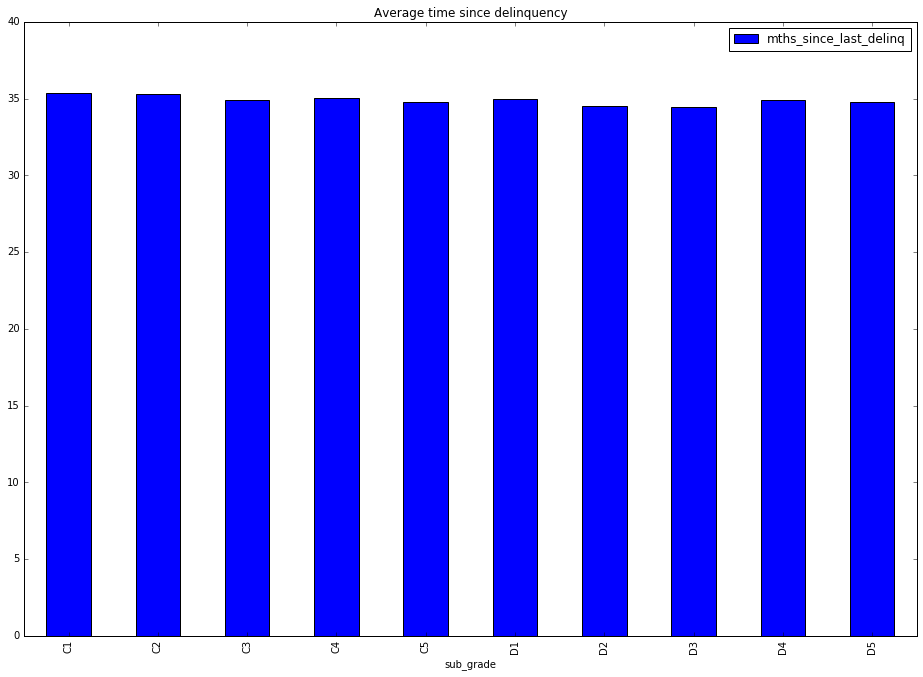

In [362]:
mths_delinq = df1.loc[0::,['mths_since_last_delinq','sub_grade']]
mths_delinq_grp = mths_delinq.groupby('sub_grade')
print(mths_delinq_grp.mean())
mths_delinq_grp.mean().plot(kind='bar',title='Average time since delinquency',figsize=(16,11))

In [375]:
plan_sub = df1.loc[0::,['pymnt_plan','sub_grade']]
plan_sub_grp = plan_sub.groupby(['pymnt_plan'])
plan_sub_grp.count()

,sub_grade
pymnt_plan,
n,46571
y,1


In [376]:
df1.pymnt_plan.value_counts()

n    46571
y        1
Name: pymnt_plan, dtype: int64

In [377]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46572 entries, 2 to 230654
Data columns (total 38 columns):
loan_amnt                 46572 non-null float64
funded_amnt               46572 non-null float64
funded_amnt_inv           46572 non-null float64
term                      46572 non-null int64
int_rate                  46572 non-null float64
installment               46572 non-null float64
grade                     46572 non-null object
sub_grade                 46572 non-null object
emp_length                46572 non-null int64
home_ownership            46572 non-null object
annual_inc                46572 non-null float64
verification_status       46572 non-null object
issue_d                   46572 non-null object
loan_status               46572 non-null object
pymnt_plan                46572 non-null object
purpose                   46572 non-null object
title                     46572 non-null object
zip_code                  46572 non-null object
addr_state            

In [378]:
df1.mths_since_last_delinq.describe()

count    46572.000000
mean        34.987607
std         14.855432
min          0.000000
25%         33.000000
50%         34.987607
75%         34.987607
max        131.000000
Name: mths_since_last_delinq, dtype: float64

           emp_length
sub_grade            
C1           5.481138
C2           5.513073
C3           5.563692
C4           5.714397
C5           5.583226
D1           5.461016
D2           5.441032
D3           5.331157
D4           5.517614
D5           5.552194


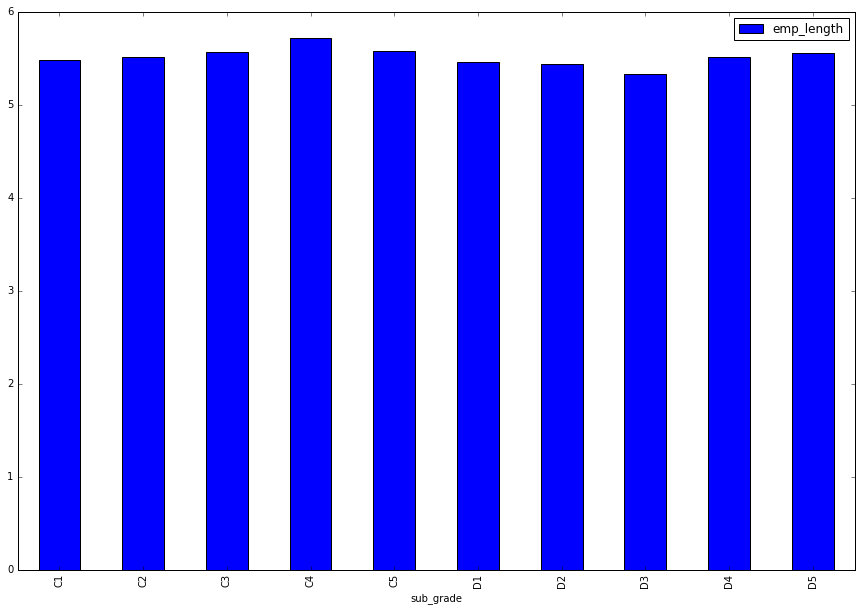

In [379]:
#Emp length and grade
emp_sub = df1.loc[0::,['emp_length','sub_grade']]
emp_sub_grp = emp_sub.groupby('sub_grade')
print(emp_sub_grp.mean())
emp_sub_grp.mean().plot(kind='bar', figsize=(15,10))

In [380]:
df1.emp_length.describe()

count    46572.000000
mean         5.521987
std          3.658774
min          0.000000
25%          2.000000
50%          5.000000
75%         10.000000
max         10.000000
Name: emp_length, dtype: float64

              loan_amnt
sub_grade              
C1         12364.511813
C2         12735.058580
C3         13193.504858
C4         13799.907588
C5         13850.172488
D1         12752.341372
D2         12436.283871
D3         13071.253109
D4         14391.367283
D5         15540.498509


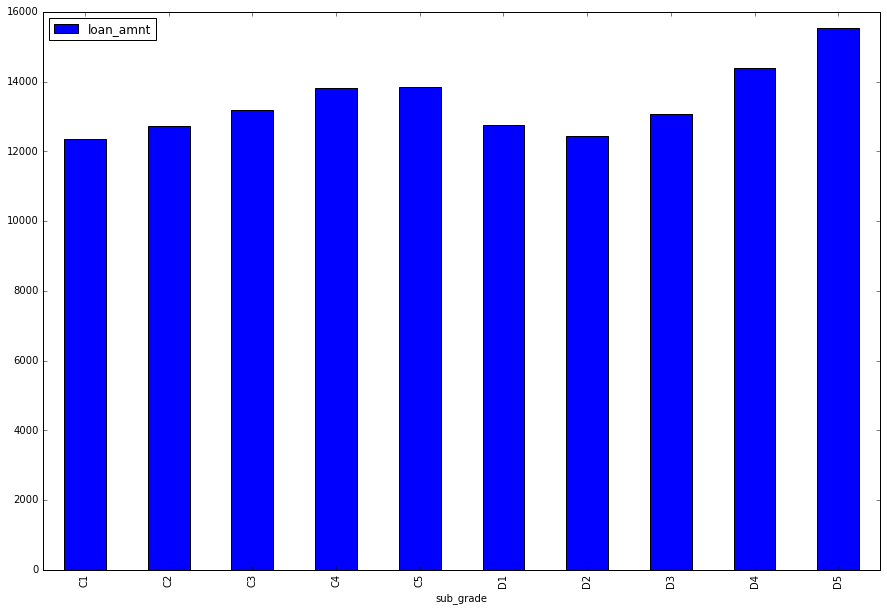

In [381]:
#loan amount and grade
loan_sub = df1.loc[0::,['loan_amnt','sub_grade']]
loan_sub_grp = loan_sub.groupby('sub_grade')
print(loan_sub_grp.mean())
loan_sub_grp.mean().plot(kind='bar',figsize=(15,10))

In [382]:
df1.loan_amnt.describe()

count    46572.000000
mean     13200.676909
std       8138.306162
min       1000.000000
25%       7000.000000
50%      11200.000000
75%      18000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [383]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46572 entries, 2 to 230654
Data columns (total 38 columns):
loan_amnt                 46572 non-null float64
funded_amnt               46572 non-null float64
funded_amnt_inv           46572 non-null float64
term                      46572 non-null int64
int_rate                  46572 non-null float64
installment               46572 non-null float64
grade                     46572 non-null object
sub_grade                 46572 non-null object
emp_length                46572 non-null int64
home_ownership            46572 non-null object
annual_inc                46572 non-null float64
verification_status       46572 non-null object
issue_d                   46572 non-null object
loan_status               46572 non-null object
pymnt_plan                46572 non-null object
purpose                   46572 non-null object
title                     46572 non-null object
zip_code                  46572 non-null object
addr_state            

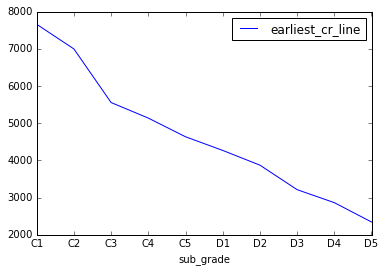

In [394]:
#earliest credit line vs count of sub_grades
cr_date = df1.loc[0::,['sub_grade','earliest_cr_line']]
cr_date_grp = cr_date.groupby(['sub_grade'])
cr_date_grp.count().plot(kind='line')

In [397]:
df1.sub_grade.value_counts()

C1    7661
C2    6999
C3    5558
C4    5140
C5    4638
D1    4271
D2    3875
D3    3216
D4    2867
D5    2347
Name: sub_grade, dtype: int64

In [398]:
#data is skewed to higher grades
plan_rate = df1.loc[0::,['sub_grade','installment','int_rate']]

           installment   int_rate
sub_grade                        
C1          398.777708  13.918773
C2          400.598971  14.666682
C3          410.409099  15.214313
C4          428.789442  15.783327
C5          428.253105  16.576220
D1          422.685774  17.179735
D2          413.216015  17.620315
D3          429.829506  17.978557
D4          459.463017  18.461402
D5          478.676170  19.047524


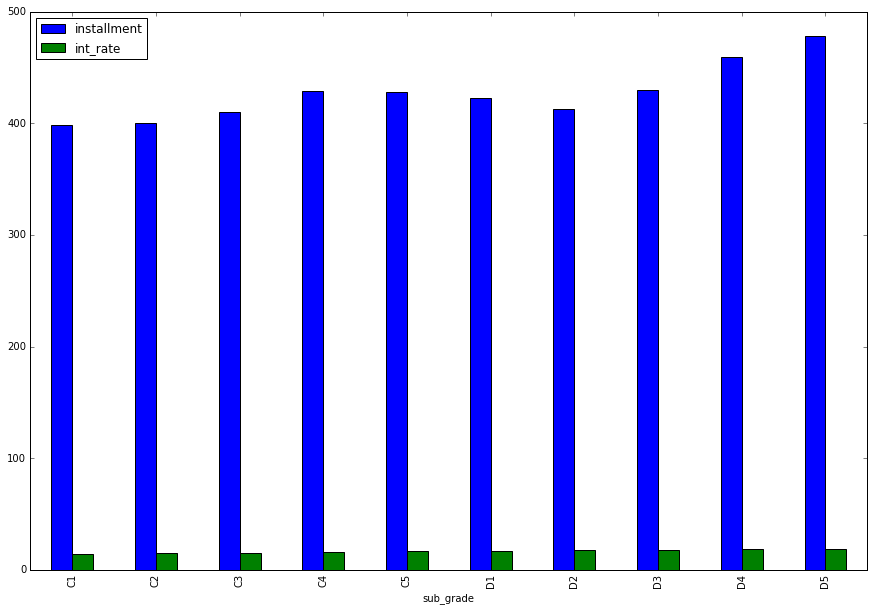

In [399]:
plan_rate_grp = plan_rate.groupby('sub_grade')
print(plan_rate_grp.mean())
plan_rate_grp.mean().plot(kind='bar',figsize=(15,10))

In [400]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46572 entries, 2 to 230654
Data columns (total 38 columns):
loan_amnt                 46572 non-null float64
funded_amnt               46572 non-null float64
funded_amnt_inv           46572 non-null float64
term                      46572 non-null int64
int_rate                  46572 non-null float64
installment               46572 non-null float64
grade                     46572 non-null object
sub_grade                 46572 non-null object
emp_length                46572 non-null int64
home_ownership            46572 non-null object
annual_inc                46572 non-null float64
verification_status       46572 non-null object
issue_d                   46572 non-null object
loan_status               46572 non-null object
pymnt_plan                46572 non-null object
purpose                   46572 non-null object
title                     46572 non-null object
zip_code                  46572 non-null object
addr_state            

In [410]:
zip_sub = df1.loc[0::,['zip_code','sub_grade']]
zip_sub_grp = zip_sub.groupby(['zip_code'])
zip_sub_grp.count()

,sub_grade
zip_code,
010xx,67
011xx,15
012xx,16
013xx,12
014xx,23
015xx,60
016xx,21
017xx,60
018xx,114


In [411]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46572 entries, 2 to 230654
Data columns (total 38 columns):
loan_amnt                 46572 non-null float64
funded_amnt               46572 non-null float64
funded_amnt_inv           46572 non-null float64
term                      46572 non-null int64
int_rate                  46572 non-null float64
installment               46572 non-null float64
grade                     46572 non-null object
sub_grade                 46572 non-null object
emp_length                46572 non-null int64
home_ownership            46572 non-null object
annual_inc                46572 non-null float64
verification_status       46572 non-null object
issue_d                   46572 non-null object
loan_status               46572 non-null object
pymnt_plan                46572 non-null object
purpose                   46572 non-null object
title                     46572 non-null object
zip_code                  46572 non-null object
addr_state            

In [412]:
df1.initial_list_status.value_counts()

f    39605
w     6967
Name: initial_list_status, dtype: int64

In [413]:
df1.revol_bal.describe()

count     46572.000000
mean      14931.385575
std       17216.534759
min           0.000000
25%        6218.000000
50%       11081.000000
75%       18913.250000
max      975800.000000
Name: revol_bal, dtype: float64

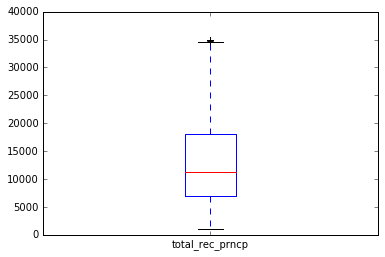

In [415]:
df1.total_rec_prncp.plot(kind='box')

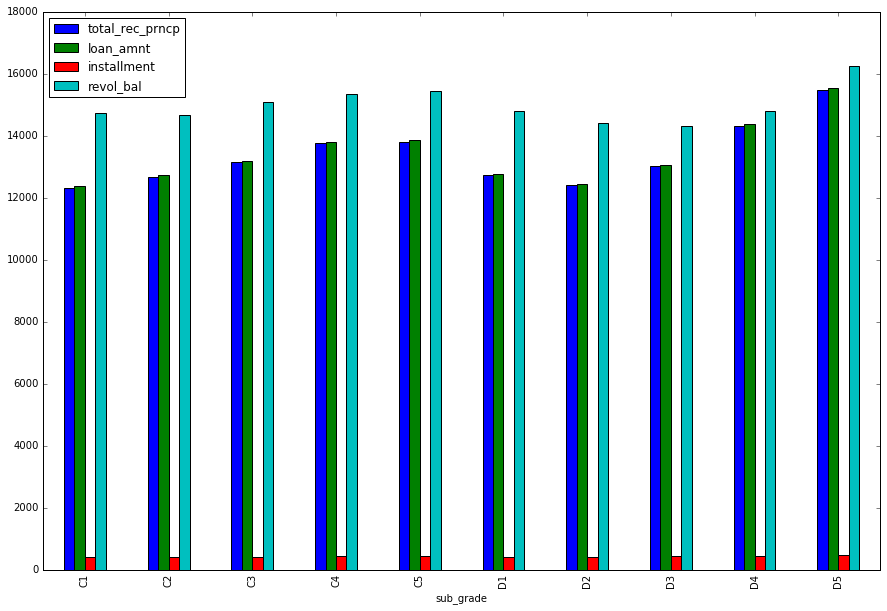

In [422]:
pr_sub = df1.loc[0::,['total_rec_prncp','sub_grade','loan_amnt','installment','revol_bal']]
pr_sub_grp = pr_sub.groupby('sub_grade')
pr_sub_grp.mean().plot(kind='bar',figsize=(15,10))

In [419]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46572 entries, 2 to 230654
Data columns (total 38 columns):
loan_amnt                 46572 non-null float64
funded_amnt               46572 non-null float64
funded_amnt_inv           46572 non-null float64
term                      46572 non-null int64
int_rate                  46572 non-null float64
installment               46572 non-null float64
grade                     46572 non-null object
sub_grade                 46572 non-null object
emp_length                46572 non-null int64
home_ownership            46572 non-null object
annual_inc                46572 non-null float64
verification_status       46572 non-null object
issue_d                   46572 non-null object
loan_status               46572 non-null object
pymnt_plan                46572 non-null object
purpose                   46572 non-null object
title                     46572 non-null object
zip_code                  46572 non-null object
addr_state            

In [420]:
df1.loan_status.value_counts()

Fully Paid    46572
Name: loan_status, dtype: int64

In [423]:
df1.title.value_counts()

debt consolidation                          8985
consolidation                               1643
credit card refinancing                     1344
debt consolidation loan                     1067
home improvement                             732
credit card consolidation                    706
personal loan                                689
other                                        569
consolidation loan                           544
credit card payoff                           454
credit card refinance                        437
consolidate                                  428
personal                                     425
loan                                         324
credit cards                                 284
payoff                                       274
debt                                         269
business                                     266
freedom                                      264
my loan                                      247
debt consolidation  

In [434]:
title_sub = df1.loc[0::,['title','sub_grade']]
title_sub_grp = title_sub.groupby(['sub_grade','title'])
title_sub_grp['sub_grade'].count()

sub_grade  title                                        
C1          consolidate                                      1
            credit card consolidation                        1
            debt consolidation                               1
            debt consolidation loan                          1
            debt loan                                        1
            get out of debt loan                             1
            got my loan baby                                 1
            home improvement                                 1
            home update                                      1
            loan                                             1
            loan 1                                           1
            medical loan  #1                                 1
            payment                                          1
            personal loan                                    1
            short term debt consolidation                    

In [435]:
df1.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,total_acc,initial_list_status,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,issue_year
2,2400.0,2400.0,2400.0,36,15.96,84.33,C,C5,10,rent,...,10.0,f,3003.653644,3003.65,2400.0,603.65,2014-06-01,649.91,2016-01-01,2011-12-01
3,10000.0,10000.0,10000.0,36,13.49,339.31,C,C1,10,rent,...,37.0,f,12226.302212,12226.30,10000.0,2209.33,2015-01-01,357.48,2015-01-01,2011-12-01
10,6500.0,6500.0,6500.0,60,14.65,153.45,C,C3,5,own,...,23.0,f,7677.520000,7677.52,6500.0,1177.52,2013-06-01,1655.54,2015-12-01,2011-12-01
15,1000.0,1000.0,1000.0,36,16.29,35.31,D,D1,0,rent,...,23.0,f,1270.171106,1270.17,1000.0,270.17,2015-01-01,36.32,2016-01-01,2011-12-01
16,10000.0,10000.0,10000.0,36,15.27,347.98,C,C4,4,rent,...,28.0,f,12519.260450,12519.26,10000.0,2519.26,2015-01-01,370.46,2015-04-01,2011-12-01


In [436]:
df1.home_ownership.value_counts()

rent        21943
mortgage    20822
own          3750
other          41
none           16
Name: home_ownership, dtype: int64

           home_ownership
sub_grade                
C1                   7661
C2                   6999
C3                   5558
C4                   5140
C5                   4638
D1                   4271
D2                   3875
D3                   3216
D4                   2867
D5                   2347


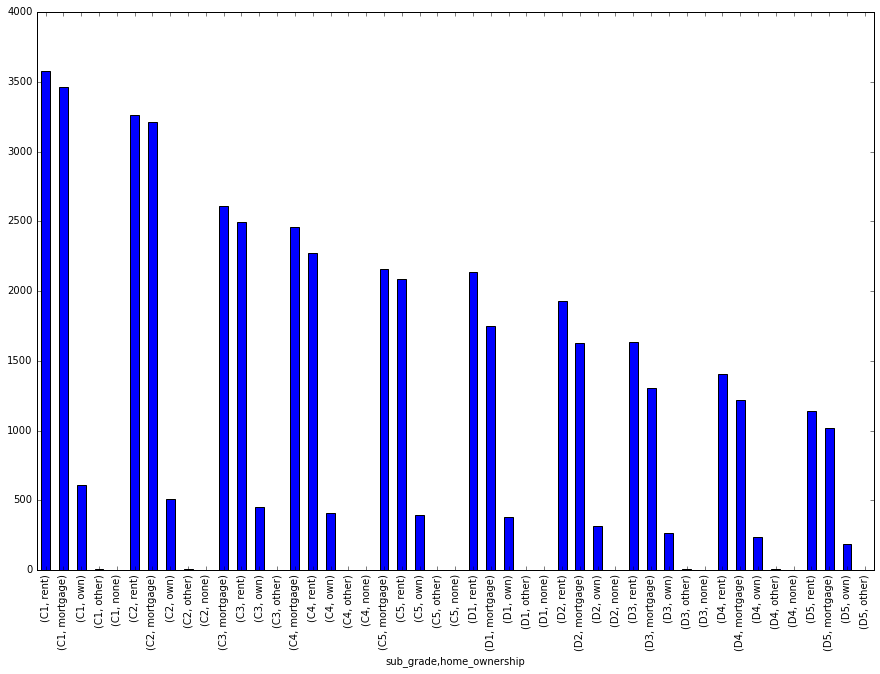

In [444]:
home_sub = df1.loc[0::,['home_ownership','sub_grade']]
home_sub_grp = home_sub.groupby('sub_grade')
print home_sub_grp.count()
home_sub_grp['home_ownership'].value_counts().plot(kind='bar',figsize=(15,10))

In [2]:
from sklearn.tree import export_graphviz